In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid') # background
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:

df = pd.read_csv('/content/ToyotaCorolla - MLR.csv')

In [ ]:
df # view dataframe

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [ ]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [ ]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [ ]:
# this provies summery like mean , std, min, max etc

In [ ]:
# In this dataset y variabl(dependent variable) is column price.
# x vatiable (independent variable ) are all other columns except price

EDA

<Axes: xlabel='Price', ylabel='Count'>

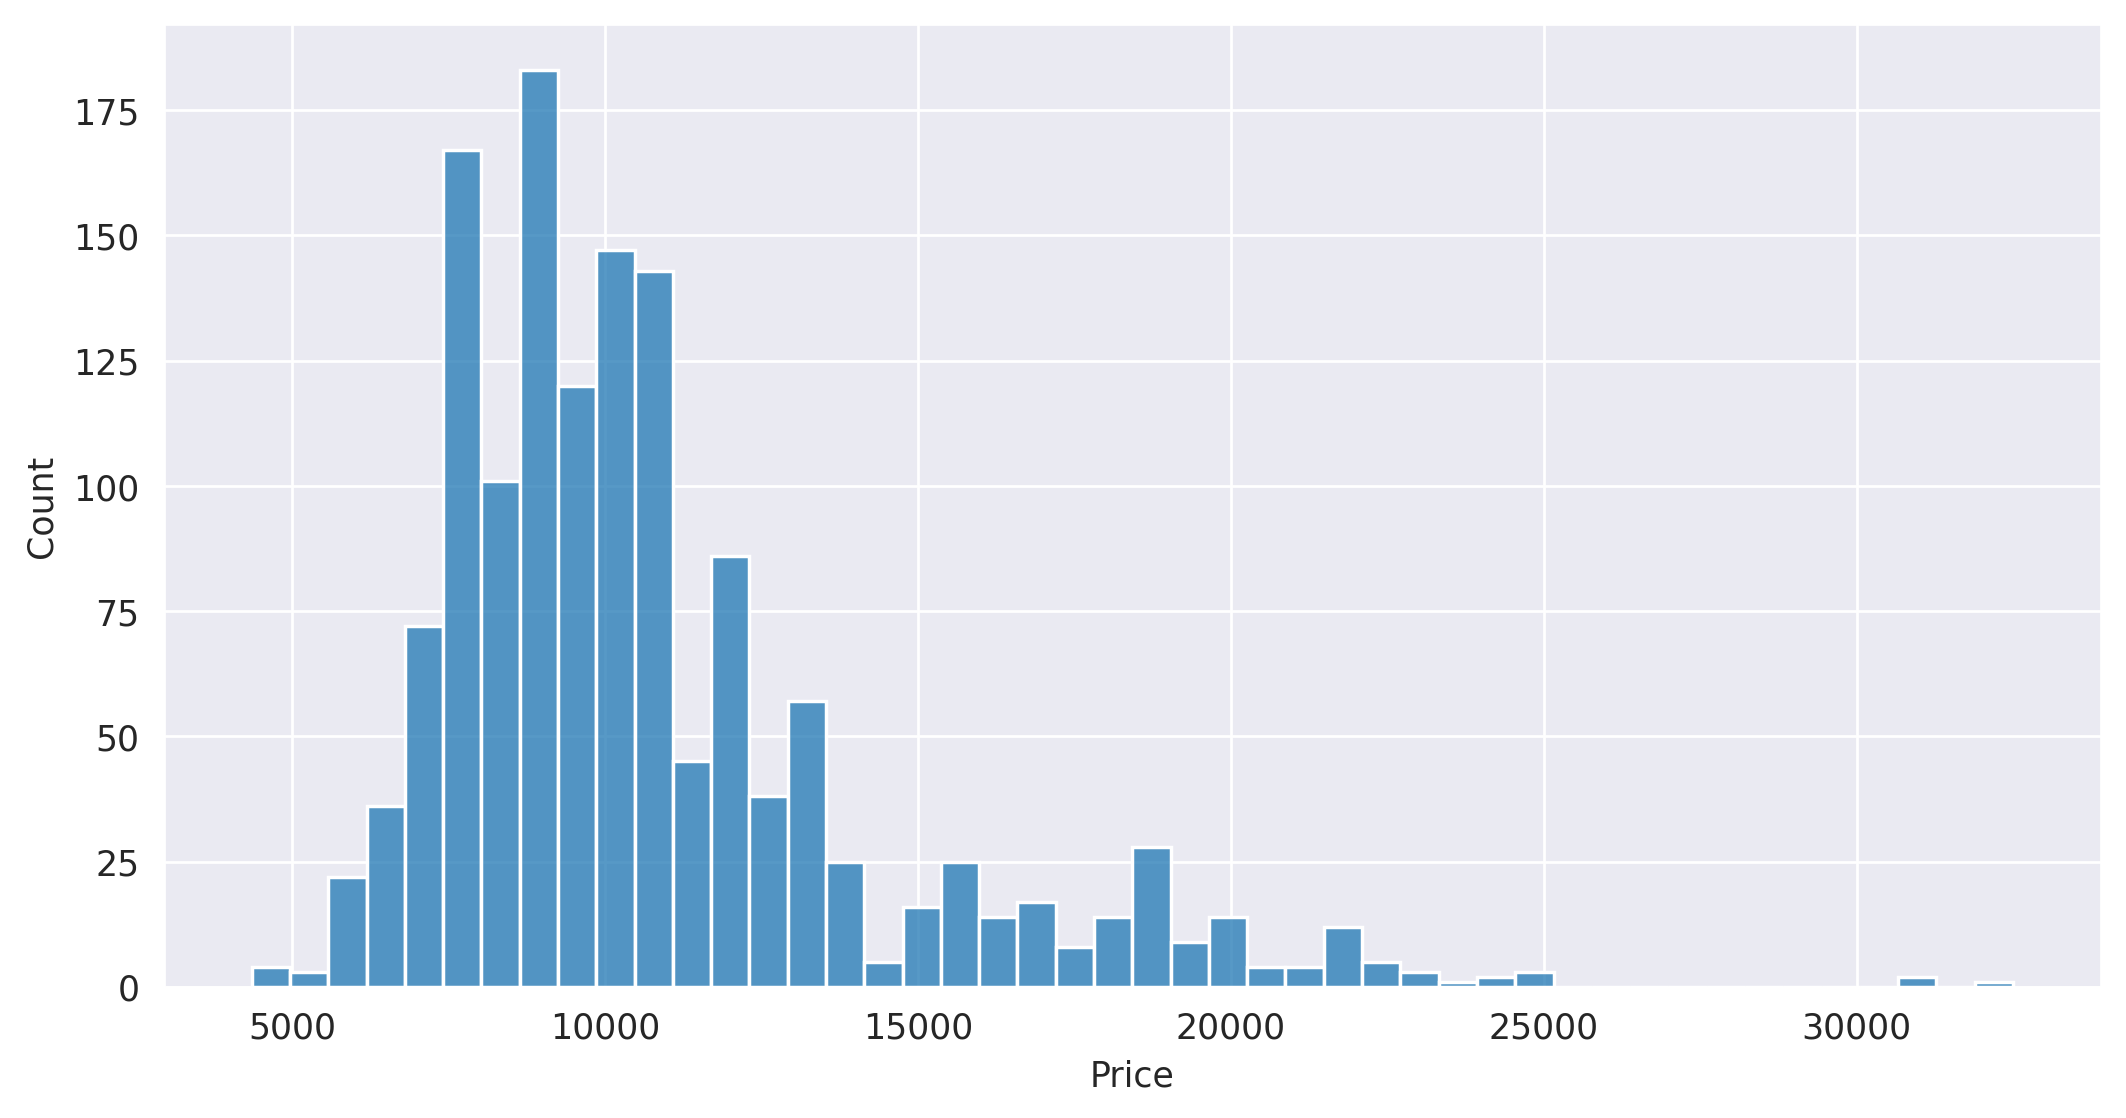

In [ ]:
sns.histplot(df['Price'])

In [ ]:
# lets check for missing values

In [ ]:
df.isna().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [ ]:
# so as we can see there are no missing values in our dataset

In [ ]:
# now check for categorical variable

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [ ]:
# as we can see there is one categorical feature "Fuel_Type",
## we need to convert catagorical feature into numerical,
## for that we will use encoding method.

In [ ]:
#using one hot encoding to convert datatype of categorical column

In [ ]:
df = pd.get_dummies(df, columns=['Fuel_Type'], dtype=int)

In [ ]:
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,0,1,0
1,13750,23,72937,90,0,2000,3,4,5,1165,0,1,0
2,13950,24,41711,90,0,2000,3,4,5,1165,0,1,0
3,14950,26,48000,90,0,2000,3,4,5,1165,0,1,0
4,13750,30,38500,90,0,2000,3,4,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,0,0,1
1432,10845,72,19000,86,0,1300,3,4,5,1015,0,0,1
1433,8500,71,17016,86,0,1300,3,4,5,1015,0,0,1
1434,7250,70,16916,86,0,1300,3,4,5,1015,0,0,1


In [ ]:
# now check for duplicate records

In [ ]:
df.duplicated().sum()

1

In [ ]:
# as we can see there is one duplicate record , we need to drop it
df.drop_duplicates(inplace=True)

In [ ]:
# again check for duplicates
df.duplicated().sum()

0

In [ ]:
# as we can see that there are no more duplicate records now.


<Axes: >

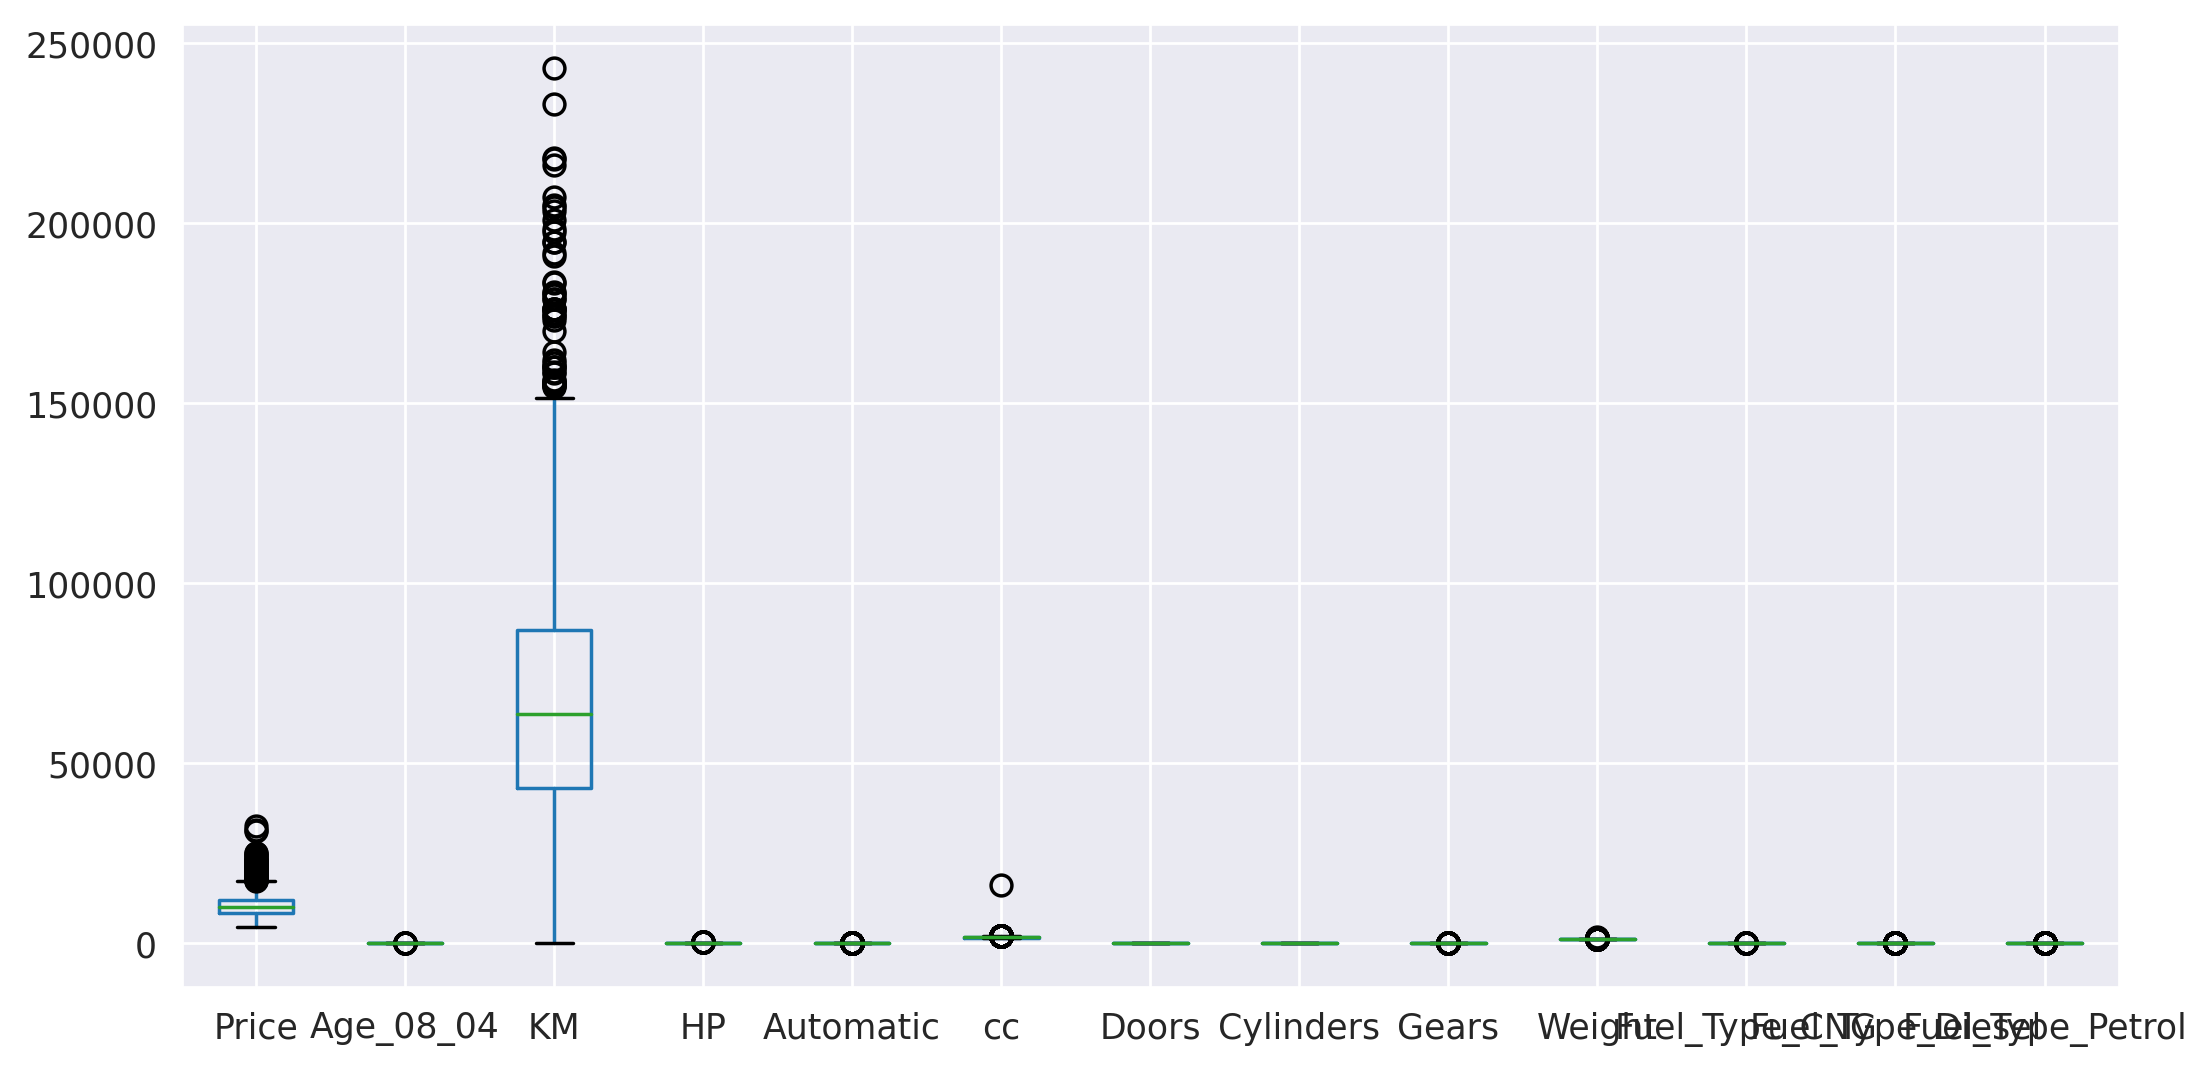

In [ ]:
# outlier detection
df.boxplot()

In [ ]:

numerical_features = ['Price','Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Weight', 'Fuel_Type_Petrol', 'Fuel_Type_Diesel', 'Fuel_Type_CNG']
df = replace_outliers_with_median(df, numerical_features)

<Axes: >

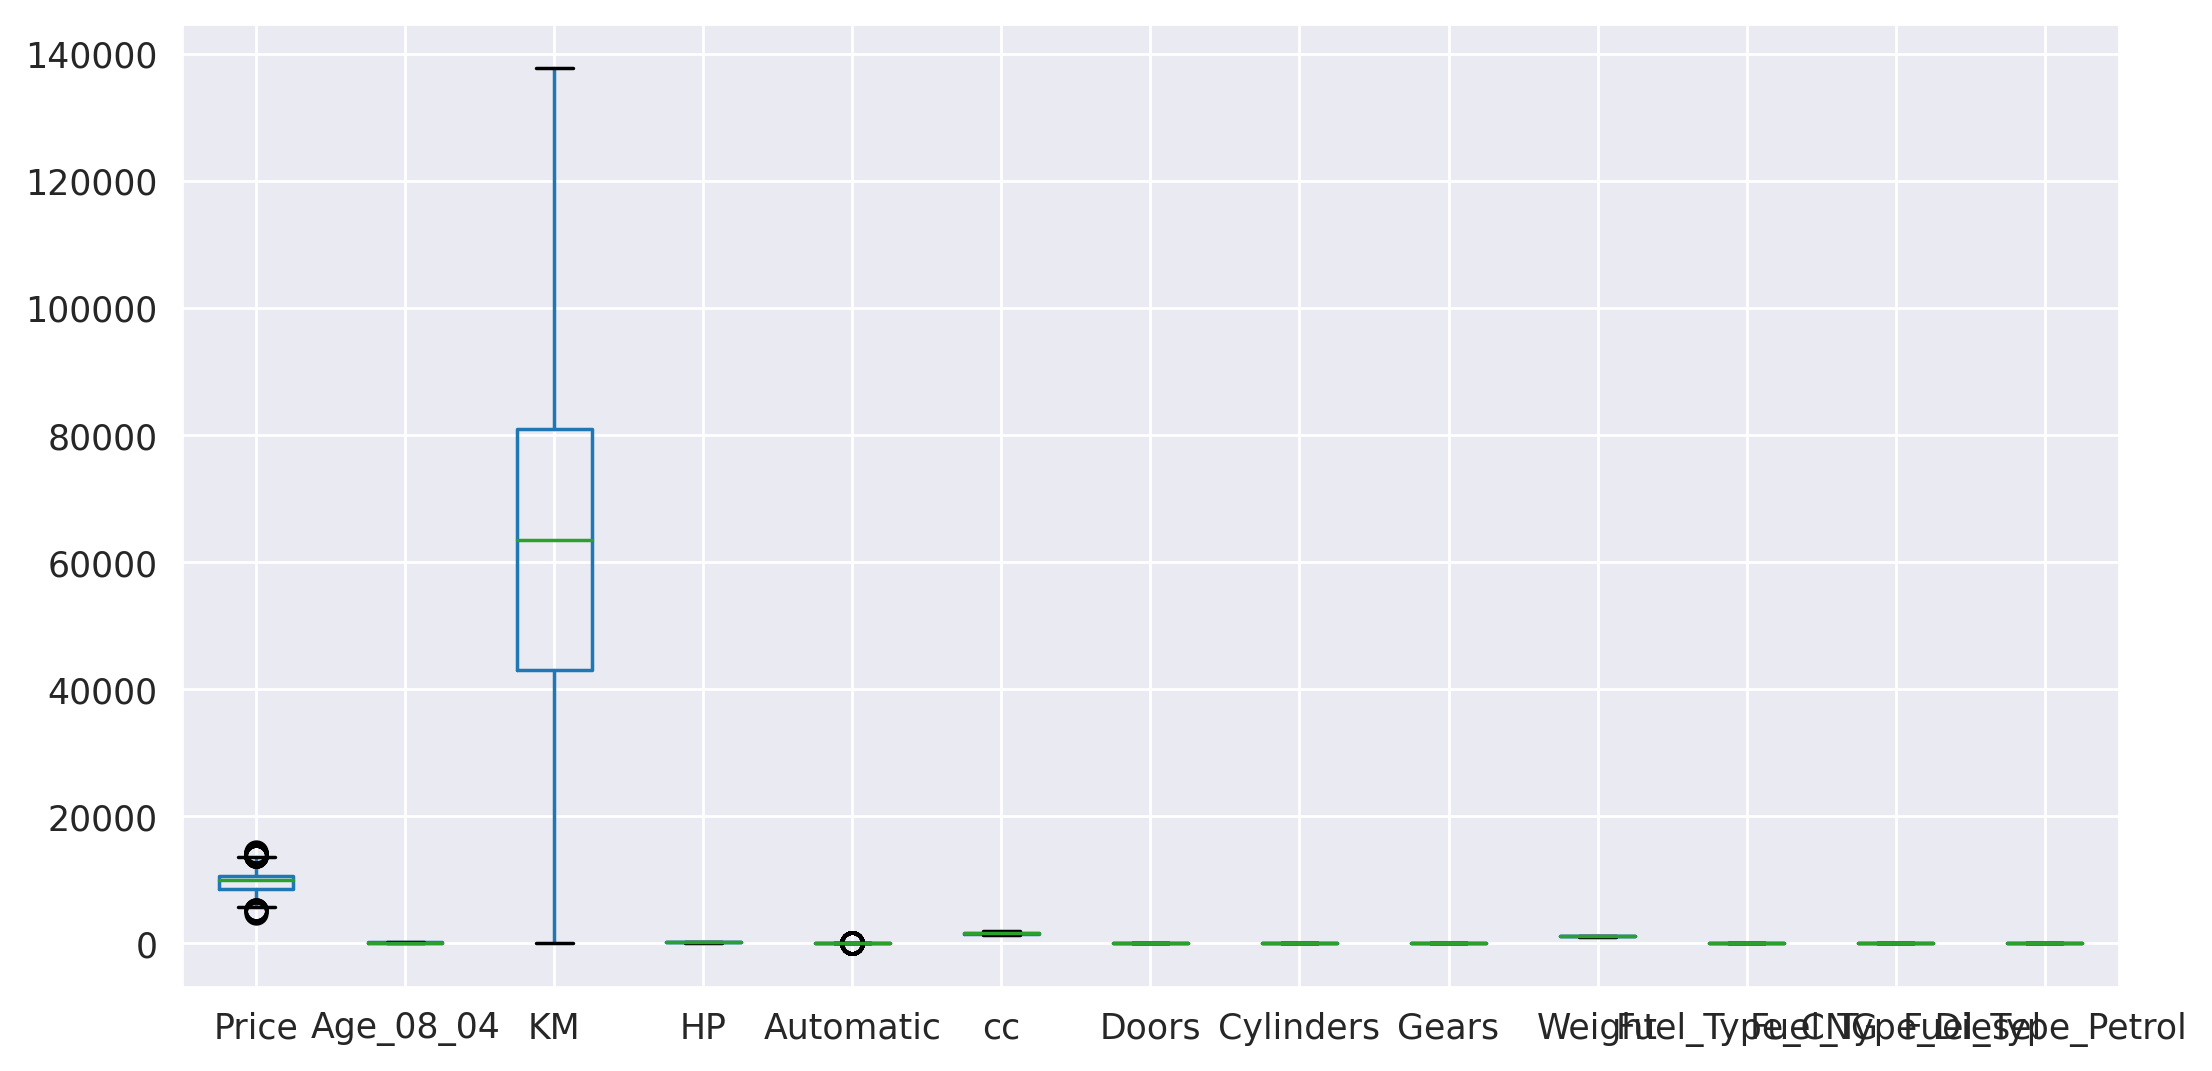

In [ ]:

df.boxplot()# as we can see there are very few outlers , now we can work with our data

<Axes: >

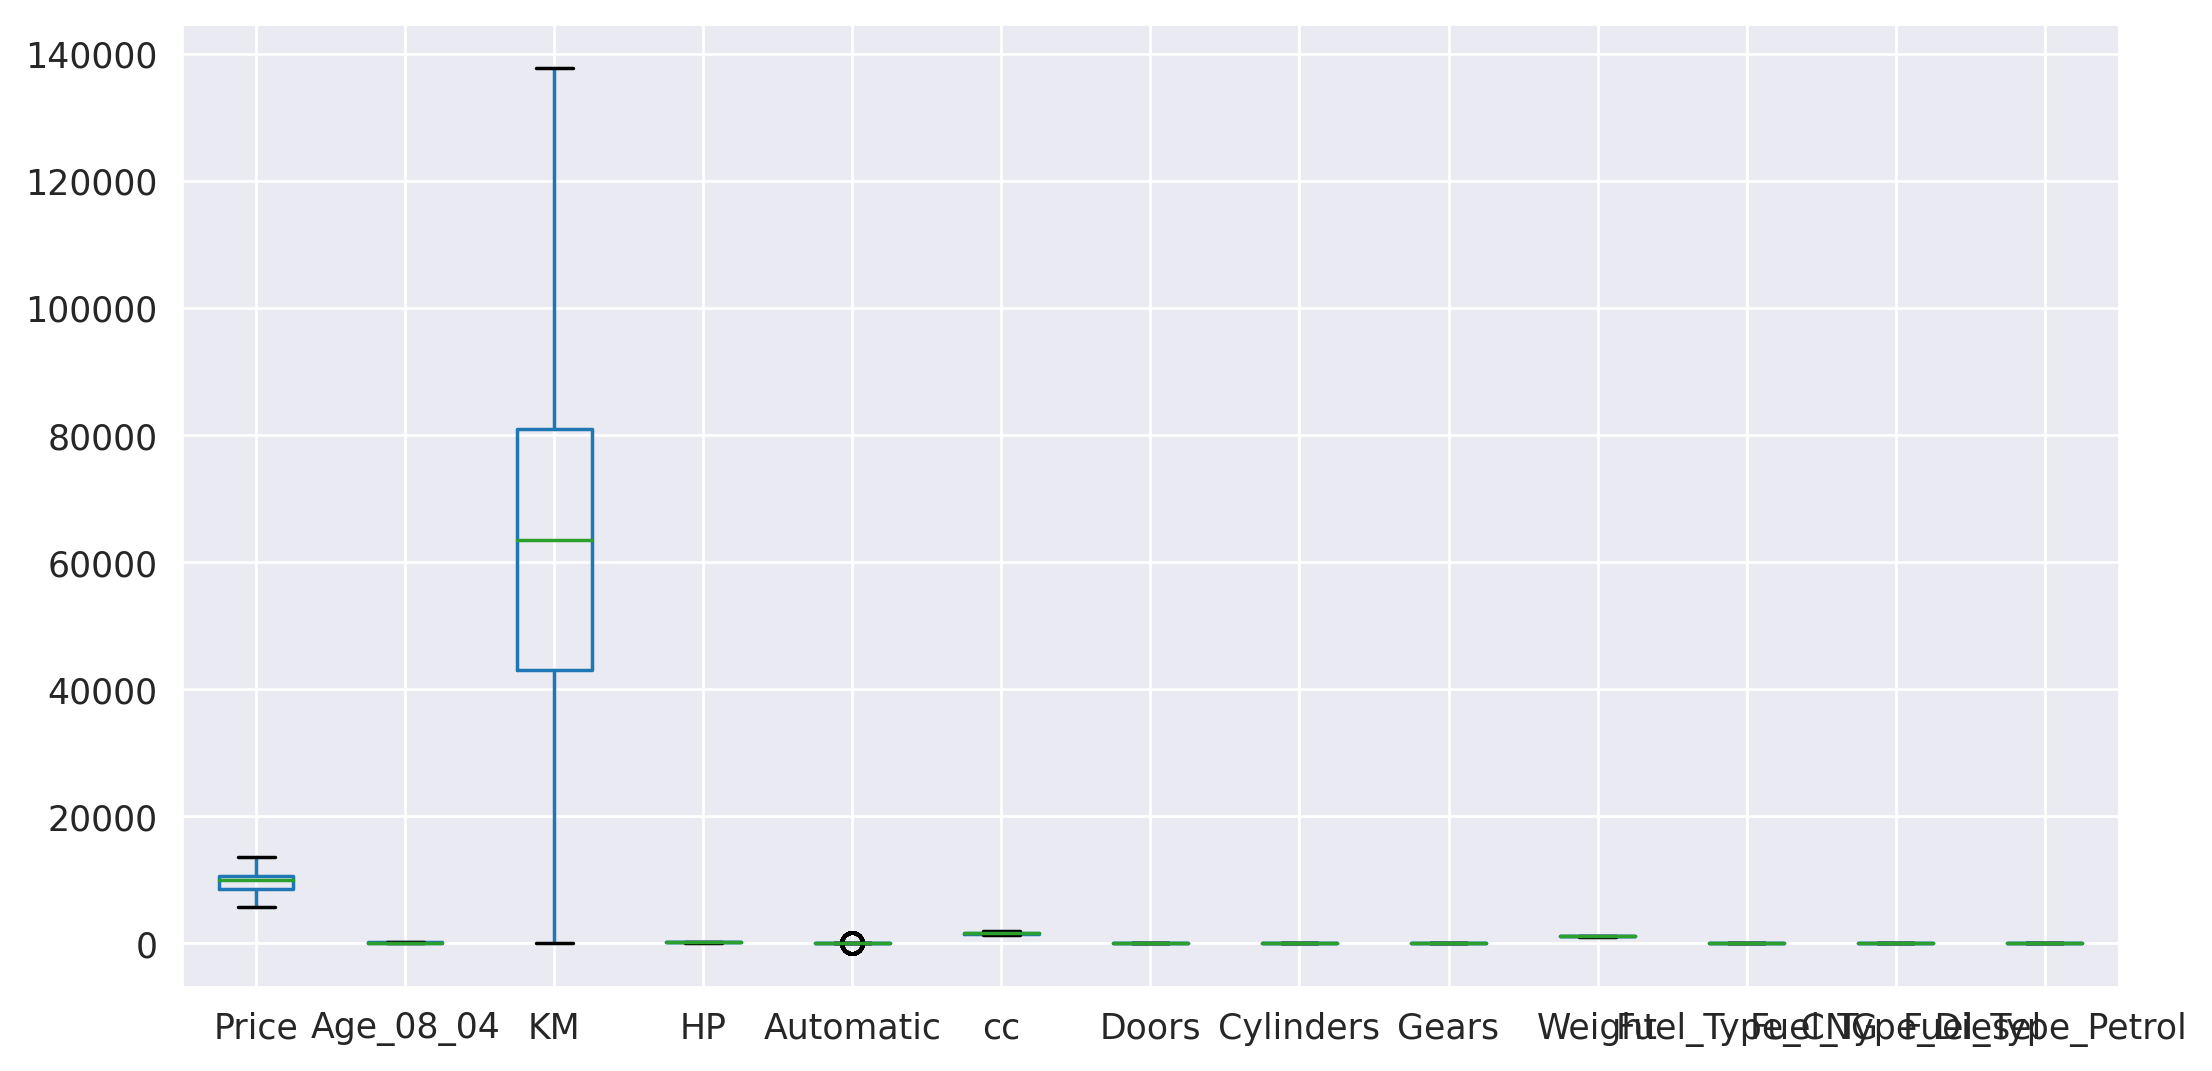

In [ ]:
numerical_features = ['Price','Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Weight', 'Fuel_Type_Petrol', 'Fuel_Type_Diesel', 'Fuel_Type_CNG']
df = replace_outliers_with_median(df, numerical_features)
df.boxplot()

In [ ]:
# here you can see the outilers are removed
# now we can work further with our data

In [ ]:
# feature scaling - normalizing our data to the same rage
# used standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# List of numerical features to scale
numerical_features = ['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Weight', 'Fuel_Type_Petrol', 'Fuel_Type_Diesel', 'Fuel_Type_CNG']

# Fit the scaler to  training data and transform both training and testing data
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [ ]:
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,-1.777268,-0.575958,-0.767351,0,0.998113,-1.084443,4,-0.140475,1.774964,-0.109493,2.884126,-2.718789
1,13750,-1.777268,0.116474,-0.767351,0,0.998113,-1.084443,4,-0.140475,1.774964,-0.109493,2.884126,-2.718789
2,13950,-1.723380,-0.716707,-0.767351,0,0.998113,-1.084443,4,-0.140475,1.774964,-0.109493,2.884126,-2.718789
3,14950,-1.615603,-0.548902,-0.767351,0,0.998113,-1.084443,4,-0.140475,1.774964,-0.109493,2.884126,-2.718789
4,13750,-1.400049,-0.802384,-0.767351,0,0.998113,-1.084443,4,-0.140475,1.870688,-0.109493,2.884126,-2.718789
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,0.701602,-1.281492,-1.034441,0,-0.651898,-1.084443,4,-0.140475,-0.905299,-0.109493,-0.346726,0.367811
1432,10845,0.863267,-1.322689,-1.034441,0,-0.651898,-1.084443,4,-0.140475,-1.096747,-0.109493,-0.346726,0.367811
1433,8500,0.809379,-1.375627,-1.034441,0,-0.651898,-1.084443,4,-0.140475,-1.096747,-0.109493,-0.346726,0.367811
1434,7250,0.755490,-1.378295,-1.034441,0,-0.651898,-1.084443,4,-0.140475,-1.096747,-0.109493,-0.346726,0.367811


In [ ]:
# now all the values are standardized and converted to the same range

In [ ]:
# checking for missingvaluse
df.fillna(0, inplace=True)  # Replace with 0
df


,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,-1.777268,-0.575958,-0.767351,0,0.998113,-1.084443,4,-0.140475,1.774964,-0.109493,2.884126,-2.718789
1,13750,-1.777268,0.116474,-0.767351,0,0.998113,-1.084443,4,-0.140475,1.774964,-0.109493,2.884126,-2.718789
2,13950,-1.723380,-0.716707,-0.767351,0,0.998113,-1.084443,4,-0.140475,1.774964,-0.109493,2.884126,-2.718789
3,14950,-1.615603,-0.548902,-0.767351,0,0.998113,-1.084443,4,-0.140475,1.774964,-0.109493,2.884126,-2.718789
4,13750,-1.400049,-0.802384,-0.767351,0,0.998113,-1.084443,4,-0.140475,1.870688,-0.109493,2.884126,-2.718789
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,0.701602,-1.281492,-1.034441,0,-0.651898,-1.084443,4,-0.140475,-0.905299,-0.109493,-0.346726,0.367811
1432,10845,0.863267,-1.322689,-1.034441,0,-0.651898,-1.084443,4,-0.140475,-1.096747,-0.109493,-0.346726,0.367811
1433,8500,0.809379,-1.375627,-1.034441,0,-0.651898,-1.084443,4,-0.140475,-1.096747,-0.109493,-0.346726,0.367811
1434,7250,0.755490,-1.378295,-1.034441,0,-0.651898,-1.084443,4,-0.140475,-1.096747,-0.109493,-0.346726,0.367811


split the dataset into training and testing

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x = df[['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Weight', 'Fuel_Type_CNG','Fuel_Type_Diesel','Fuel_Type_Petrol']]  # Replace with your feature columns
y = df['Price']  # Replace with  target column

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

bulid three different multilinear regression models

In [ ]:
# Model 1: All Features
import statsmodels.formula.api as smf



In [ ]:
#model1
model1 = smf.ols('Price ~ Age_08_04 + KM + HP + cc + Doors + Gears + Weight +Fuel_Type_CNG + Fuel_Type_Diesel + Fuel_Type_Petrol', data=df).fit()
model1.pvalues
model1.rsquared # model accuracy


0.8634250203793776

In [ ]:
#model2
model2 = smf.ols('Price ~ Age_08_04 + KM + HP + cc + Weight', data=df).fit()
model2.pvalues
model2.rsquared # model accuracy

0.8606427478364218

In [ ]:
#model3
model3 = smf.ols('Price ~ Age_08_04  + cc  + Gears + Weight', data=df).fit()
model3.pvalues
model3.rsquared # model accuracy


0.8071392746528093

evaluate performance

In [ ]:
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the testing data
y_pred = model1.predict(x_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the results
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared (R2):', r2)

Mean Squared Error (MSE): 1899721.7244488313
Root Mean Squared Error (RMSE): 1378.303930361091
R-squared (R2): 0.8416520345123534


Apply lasso and Ridge regularization

In [ ]:
# lasso regression

In [ ]:
# importing lasso
from sklearn.linear_model import Lasso

In [ ]:
l1 = Lasso()
l1.fit(x_train,y_train)
l1.score(x_train,y_train),l1.score(x_test,y_test)

(0.8703562445480812, 0.8195529895473416)

In [ ]:
l1.coef_

array([-2239.20594532,  -602.60301131,   226.56598404,   -12.25785389,
         -88.95729816,    79.95280516,  1401.21095683,   -27.35725339,
        -220.86046613,   288.050966  ])

In [ ]:
# as model seems to be overfitted
#it needs hyperparameetre tuning

# hyperparameter tuning

In [ ]:
for i in range(100,200): # try 50 to 100, 100 to 200
  l1 = Lasso(alpha = i)
  l1.fit(x_train,y_train)
  print(f"Alpha: {i} Train: {l1.score(x_train,y_train)} Test: {l1.score(x_test,y_test)}")

Alpha: 100 Train: 0.8651837986605524 Test: 0.8410145117317809
Alpha: 101 Train: 0.8651043214846211 Test: 0.8411272808700856
Alpha: 102 Train: 0.8650240875191506 Test: 0.8412385693458035
Alpha: 103 Train: 0.8649430746214148 Test: 0.8413484441612444
Alpha: 104 Train: 0.8648592791919176 Test: 0.8414624449431273
Alpha: 105 Train: 0.8647767356388552 Test: 0.8415693252303527
Alpha: 106 Train: 0.8646934064193209 Test: 0.841674818615268
Alpha: 107 Train: 0.8646093018214807 Test: 0.8417788987088083
Alpha: 108 Train: 0.864524410834324 Test: 0.8418815952799492
Alpha: 109 Train: 0.8644387371598982 Test: 0.8419828992243524
Alpha: 110 Train: 0.8643522761285038 Test: 0.8420828226429627
Alpha: 111 Train: 0.8642650277401411 Test: 0.8421813655357802
Alpha: 112 Train: 0.8641769919948099 Test: 0.8422785279028047
Alpha: 113 Train: 0.8640881688925102 Test: 0.8423743097440364
Alpha: 114 Train: 0.863998558433242 Test: 0.8424687110594751
Alpha: 115 Train: 0.8639081606170054 Test: 0.842561731849121
Alpha: 116 T

In [ ]:
l1 = Lasso(alpha = 175) # l1 score
l1.fit(x_train,y_train)
l1.score(x_train,y_train),l1.score(x_test,y_test)

(0.8594884654063768, 0.8444662308612509)

In [ ]:
l1.coef_

array([-2217.83382608,  -635.55747316,   353.65236115,    -0.        ,
           0.        ,     0.        ,   873.46310248,    -0.        ,
          -0.        ,     0.        ])

In [ ]:
#nice results

Ridge regression


In [ ]:
# importing ridge regerssion
from sklearn.linear_model import Ridge

In [ ]:
l2 = Ridge()
l2.fit(x_train,y_train)
l2.score(x_train,y_train),l1.score(x_test,y_test)

(0.8703564570436252, 0.8444662308612509)

In [ ]:
for i in range(1,100):  # perfoeming in loops
  l2 = Ridge(alpha = i)
  l2.fit(x_train,y_train)
  print(f"Alpha: {i} Train: {l2.score(x_train,y_train)} Test: {l2.score(x_test,y_test)}")


Alpha: 1 Train: 0.8703564570436252 Test: 0.8195151478371113
Alpha: 2 Train: 0.8703547929952155 Test: 0.8197954920683511
Alpha: 3 Train: 0.8703520442673353 Test: 0.8200713682666144
Alpha: 4 Train: 0.8703482304084013 Test: 0.8203428617510189
Alpha: 5 Train: 0.8703433704175878 Test: 0.8206100555954406
Alpha: 6 Train: 0.8703374827641545 Test: 0.8208730307017303
Alpha: 7 Train: 0.8703305854059773 Test: 0.8211318658701035
Alpha: 8 Train: 0.8703226958073207 Test: 0.8213866378668361
Alpha: 9 Train: 0.8703138309558853 Test: 0.8216374214893787
Alpha: 10 Train: 0.8703040073791665 Test: 0.8218842896290084
Alpha: 11 Train: 0.8702932411601527 Test: 0.822127313331119
Alpha: 12 Train: 0.8702815479523971 Test: 0.822366561853257
Alpha: 13 Train: 0.8702689429944885 Test: 0.8226021027209975
Alpha: 14 Train: 0.87025544112395 Test: 0.8228340017817539
Alpha: 15 Train: 0.8702410567905915 Test: 0.8230623232566071
Alpha: 16 Train: 0.8702258040693382 Test: 0.8232871297902415
Alpha: 17 Train: 0.8702096966725628 T

In [ ]:
l2 = Ridge(alpha = 8)
l2.fit(x_train,y_train) # performing ridge regression
l2.score(x_train,y_train),l2.score(x_test,y_test)

(0.8703226958073207, 0.8213866378668361)

In [ ]:
l2.coef_  # l2.coef_ represents the coefficients estimated by the model for each of the predictor features in  dataset.

array([-2223.15616582,  -614.26287662,   238.21841868,   -12.54549914,
         -83.49008941,    80.64452132,  1381.94374772,   -40.48978689,
        -239.84810828,   242.66118686])

#Interview Question

(1) What is Normalization & Standardization and how is it helpful?

Normalization and Standardization are data preprocessing techniques used in machine learning to rescale features to a similar range. This can improve the performance of many machine learning algorithms.

Improved Algorithm Performance: By bringing features to a similar scale, it prevents features with larger values from dominating the model and helps algorithms converge faster.

Reduced Outlier Impact: Scaling can reduce the influence of extreme values or outliers, which can distort model training.

Better Model Interpretability: When features are on the same scale, it's easier to compare the importance of different features based on their coefficients.

(2) What techniques can be used to address multicollinearity in multiple linear regression?

1. Feature Selection/Removal:
If two or more features are highly correlated, consider removing one of them.

2. Feature Engineering/Combination

3. Regularization Techniques:
Lasso (L1) and Ridge (L2) regression add penalty terms to the regression equation, which can shrink the coefficients of correlated variables, reducing their influence.

4. Principal Component Analysis (PCA):
PCA is a dimensionality reduction technique that can transform correlated variables into a smaller set of uncorrelated principal components.